# **HR_Analytics Employee_Attrition Classification Models**

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

pd.set_option("display.float_format","{:.2f}".format)
pd.set_option("display.max_columns", 80)
pd.set_option("display.max_rows", 80)

In [98]:
import io
data = pd.read_csv(r'HR-Employee-Attrition.csv')

In [99]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [100]:
data.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,2,Male,82,4,2,Laboratory Technician,3,Married,4404,10228,2,Y,No,12,3,1,80,0,6,3,4,4,3,1,2


# 1. Exploratory Data Analysis
- Find patterns in data through data visualization. Reveal hidden secrets of the data through graphs, analysis and charts.
- **Univariate analysis**
   - Continous variables : Histograms, boxplots. This gives us understanding about the central tendency and spread
   - Categorical variable : Bar chart showing frequency in each category
- **Bivariate analysis**
    - Continous & Continous : Scatter plots to know how continous variables interact with each other
    - Categorical & categorical : Stacked column chart to show how the frequencies are spread between two categorical variables
    - Categorical & Continous : Boxplots, Swamplots or even bar charts

**Detect outliers**

**Feature engineering**

In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [102]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00
mean,36.92,802.49,9.19,2.91,1.00,1024.87,2.72,65.89,2.73,2.06,2.73,6502.93,14313.10,2.69,15.21,3.15,2.71,80.00,0.79,11.28,2.80,2.76,7.01,4.23,2.19,4.12
std,9.14,403.51,8.11,1.02,0.00,602.02,1.09,20.33,0.71,1.11,1.10,4707.96,7117.79,2.50,3.66,0.36,1.08,0.00,0.85,7.78,1.29,0.71,6.13,3.62,3.22,3.57
min,18.00,102.00,1.00,1.00,1.00,1.00,1.00,30.00,1.00,1.00,1.00,1009.00,2094.00,0.00,11.00,3.00,1.00,80.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
25%,30.00,465.00,2.00,2.00,1.00,491.25,2.00,48.00,2.00,1.00,2.00,2911.00,8047.00,1.00,12.00,3.00,2.00,80.00,0.00,6.00,2.00,2.00,3.00,2.00,0.00,2.00
50%,36.00,802.00,7.00,3.00,1.00,1020.50,3.00,66.00,3.00,2.00,3.00,4919.00,14235.50,2.00,14.00,3.00,3.00,80.00,1.00,10.00,3.00,3.00,5.00,3.00,1.00,3.00
75%,43.00,1157.00,14.00,4.00,1.00,1555.75,4.00,83.75,3.00,3.00,4.00,8379.00,20461.50,4.00,18.00,3.00,4.00,80.00,1.00,15.00,3.00,3.00,9.00,7.00,3.00,7.00
max,60.00,1499.00,29.00,5.00,1.00,2068.00,4.00,100.00,4.00,5.00,4.00,19999.00,26999.00,9.00,25.00,4.00,4.00,80.00,3.00,40.00,6.00,4.00,40.00,18.00,15.00,17.00


In [103]:
data.describe(include='all')

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.00,1470,1470,1470.00,1470,1470.00,1470.00,1470,1470.00,1470.00,1470.00,1470,1470.00,1470.00,1470.00,1470,1470.00,1470,1470.00,1470.00,1470.00,1470,1470,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00
unique,nan,2,3,nan,3,nan,nan,6,nan,nan,nan,2,nan,nan,nan,9,nan,3,nan,nan,nan,1,2,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
top,nan,No,Travel_Rarely,nan,Research & Development,nan,nan,Life Sciences,nan,nan,nan,Male,nan,nan,nan,Sales Executive,nan,Married,nan,nan,nan,Y,No,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
freq,nan,1233,1043,nan,961,nan,nan,606,nan,nan,nan,882,nan,nan,nan,326,nan,673,nan,nan,nan,1470,1054,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
mean,36.92,NaN,NaN,802.49,NaN,9.19,2.91,NaN,1.00,1024.87,2.72,NaN,65.89,2.73,2.06,NaN,2.73,NaN,6502.93,14313.10,2.69,NaN,NaN,15.21,3.15,2.71,80.00,0.79,11.28,2.80,2.76,7.01,4.23,2.19,4.12
std,9.14,NaN,NaN,403.51,NaN,8.11,1.02,NaN,0.00,602.02,1.09,NaN,20.33,0.71,1.11,NaN,1.10,NaN,4707.96,7117.79,2.50,NaN,NaN,3.66,0.36,1.08,0.00,0.85,7.78,1.29,0.71,6.13,3.62,3.22,3.57
min,18.00,NaN,NaN,102.00,NaN,1.00,1.00,NaN,1.00,1.00,1.00,NaN,30.00,1.00,1.00,NaN,1.00,NaN,1009.00,2094.00,0.00,NaN,NaN,11.00,3.00,1.00,80.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
25%,30.00,NaN,NaN,465.00,NaN,2.00,2.00,NaN,1.00,491.25,2.00,NaN,48.00,2.00,1.00,NaN,2.00,NaN,2911.00,8047.00,1.00,NaN,NaN,12.00,3.00,2.00,80.00,0.00,6.00,2.00,2.00,3.00,2.00,0.00,2.00
50%,36.00,NaN,NaN,802.00,NaN,7.00,3.00,NaN,1.00,1020.50,3.00,NaN,66.00,3.00,2.00,NaN,3.00,NaN,4919.00,14235.50,2.00,NaN,NaN,14.00,3.00,3.00,80.00,1.00,10.00,3.00,3.00,5.00,3.00,1.00,3.00
75%,43.00,NaN,NaN,1157.00,NaN,14.00,4.00,NaN,1.00,1555.75,4.00,NaN,83.75,3.00,3.00,NaN,4.00,NaN,8379.00,20461.50,4.00,NaN,NaN,18.00,3.00,4.00,80.00,1.00,15.00,3.00,3.00,9.00,7.00,3.00,7.00


In [104]:
for column in data.columns:
    print(f"{column} : Number of Unique values {data[column].nunique()}")
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~``")

Age : Number of Unique values 43
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~``
Attrition : Number of Unique values 2
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~``
BusinessTravel : Number of Unique values 3
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~``
DailyRate : Number of Unique values 886
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~``
Department : Number of Unique values 3
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~``
DistanceFromHome : Number of Unique values 29
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~``
Education : Number of Unique values 5
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~``
EducationField : Number of Unique values 6
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~``
EmployeeCount : Number of Unique values 1
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

**We notice that 'EmployeeCount', 'Over18', 'StandardHours' have only one unique values and 'EmployeeNumber' has 1470 unique values. This features aren't useful for us, So we are going to drop those columns.**

In [105]:
data.drop(['EmployeeCount','EmployeeNumber','Over18','StandardHours'],axis='columns',inplace=True)

# Categorical Features

In [106]:
object_col = []
for column in data.columns:
    if data[column].dtype == object and len(data[column].unique()) <= 30:
        object_col.append(column)
        print(f"{column} : {data[column].unique()}")
        print(data[column].value_counts())
        print("==========================================================================================")
object_col.remove('Attrition')

Attrition : ['Yes' 'No']
No     1233
Yes     237
Name: Attrition, dtype: int64
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
Department : ['Sales' 'Research & Development' 'Human Resources']
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
Gender : ['Female' 'Male']
Male      882
Female    588
Name: Gender, dtype: int64
JobRole : ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human 

In [107]:
len(object_col)

7

In [108]:
#Mapping the attrition 1 - yes and 0 - no in the new column
data["left"] = np.where(data["Attrition"] == "Yes",1,0)

data.head(50)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,left
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0,1
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2,0
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,No,13,3,3,0,8,2,2,7,7,3,6,0
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,3,Female,81,4,1,Laboratory Technician,1,Married,2670,9964,4,Yes,20,4,1,3,12,3,2,1,0,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,4,Male,67,3,1,Laboratory Technician,3,Divorced,2693,13335,1,No,22,4,2,1,1,2,3,1,0,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,4,Male,44,2,3,Manufacturing Director,3,Single,9526,8787,0,No,21,4,2,0,10,2,3,9,7,1,8,0
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,3,Male,94,3,2,Healthcare Representative,3,Married,5237,16577,6,No,13,3,2,2,17,3,2,7,7,7,7,0


In [109]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
data["Attrition"] = label.fit_transform(data.Attrition)

# Numerical Features

In [110]:
disc_col = []
for column in data.columns:
    if data[column].dtypes != object and data[column].nunique() < 30:
        print(f"{column} : {data[column].unique()}")
        disc_col.append(column)
        print("====================================")
disc_col.remove('Attrition')

Attrition : [1 0]
DistanceFromHome : [ 1  8  2  3 24 23 27 16 15 26 19 21  5 11  9  7  6 10  4 25 12 18 29 22
 14 20 28 17 13]
Education : [2 1 4 3 5]
EnvironmentSatisfaction : [2 3 4 1]
JobInvolvement : [3 2 4 1]
JobLevel : [2 1 3 4 5]
JobSatisfaction : [4 2 3 1]
NumCompaniesWorked : [8 1 6 9 0 4 5 2 7 3]
PercentSalaryHike : [11 23 15 12 13 20 22 21 17 14 16 18 19 24 25]
PerformanceRating : [3 4]
RelationshipSatisfaction : [1 4 2 3]
StockOptionLevel : [0 1 3 2]
TrainingTimesLastYear : [0 3 2 5 1 4 6]
WorkLifeBalance : [1 3 2 4]
YearsInCurrentRole : [ 4  7  0  2  5  9  8  3  6 13  1 15 14 16 11 10 12 18 17]
YearsSinceLastPromotion : [ 0  1  3  2  7  4  8  6  5 15  9 13 12 10 11 14]
YearsWithCurrManager : [ 5  7  0  2  6  8  3 11 17  1  4 12  9 10 15 13 16 14]
left : [1 0]


In [111]:
cont_col = []
for column in data.columns:
    if data[column].dtypes != object and data[column].nunique() > 30:
        print(f"{column} : Minimum: {data[column].min()}, Maximum: {data[column].max()}")
        cont_col.append(column)
        print("====================================")

Age : Minimum: 18, Maximum: 60
DailyRate : Minimum: 102, Maximum: 1499
HourlyRate : Minimum: 30, Maximum: 100
MonthlyIncome : Minimum: 1009, Maximum: 19999
MonthlyRate : Minimum: 2094, Maximum: 26999
TotalWorkingYears : Minimum: 0, Maximum: 40
YearsAtCompany : Minimum: 0, Maximum: 40


In [112]:
#supressing all the warnings
import warnings
warnings.filterwarnings('ignore')

In [113]:
def NumericalVariables_targetPlots(df,segment_by,target_var = "Attrition"):
    """A function for plotting the distribution of numerical variables and its effect on attrition"""
    
    fig, ax = plt.subplots(ncols= 2, figsize = (14,6))    

    #boxplot for comparison
    sns.boxplot(x = target_var, y = segment_by, data=df, ax=ax[0])
    ax[0].set_title("Comparision of " + segment_by + " vs " + target_var)
    
    #distribution plot
    ax[1].set_title("Distribution of "+segment_by)
    ax[1].set_ylabel("Frequency")
    sns.distplot(a = df[segment_by], ax=ax[1], kde=False)
    
    plt.show()

In [114]:
def CategoricalVariables_targetPlots(df, segment_by,invert_axis = False, target_var = "left"):
    
    """A function for Plotting the effect of variables(categorical data) on attrition """
    
    fig, ax = plt.subplots(ncols= 2, figsize = (14,6))
    
    #countplot for distribution along with target variable
    #invert axis variable helps to inter change the axis so that names of categories doesn't overlap
    if invert_axis == False:
        sns.countplot(x = segment_by, data=df,hue="Attrition",ax=ax[0])
    else:
        sns.countplot(y = segment_by, data=df,hue="Attrition",ax=ax[0])
        
    ax[0].set_title("Comparision of " + segment_by + " vs " + "Attrition")
    
    #plot the effect of variable on attrition
    if invert_axis == False:
        sns.barplot(x = segment_by, y = target_var ,data=df,ci=None)
    else:
        sns.barplot(y = segment_by, x = target_var ,data=df,ci=None)
        
    ax[1].set_title("Attrition rate by {}".format(segment_by))
    ax[1].set_ylabel("Average(Attrition)")
    plt.tight_layout()

    plt.show()

# Analyizing the variables
- **Numerical Variables**

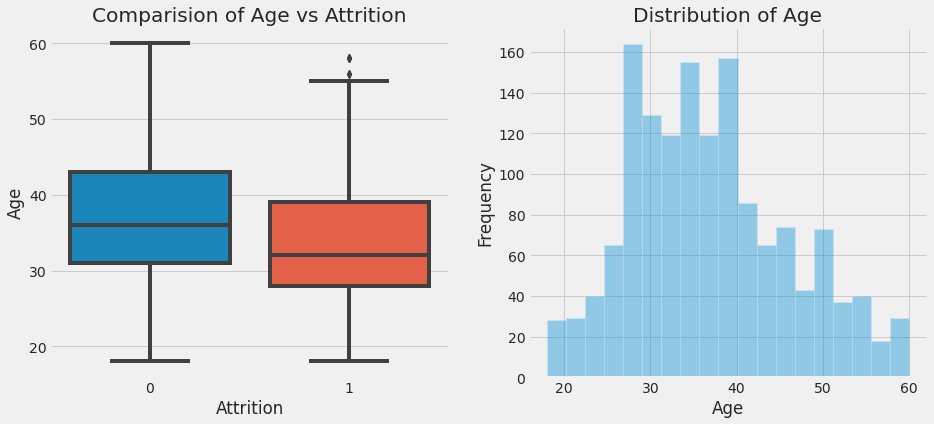

In [115]:
# we are checking the distribution of employee age and its related to attrition or not

NumericalVariables_targetPlots(data,segment_by="Age")

- **We found that median age of employee's in the company is 30 - 40 Yrs. Minimum age is 18 Yrs and Maximum age is 60 Yrs.**
- **From the Age Comparision boxplot, majority of people who left the company are below 40 Yrs and among the people who didn't left the company are of age 32 to 40 years**

##  **Daily Rate & Montly Income & HourlyRate**

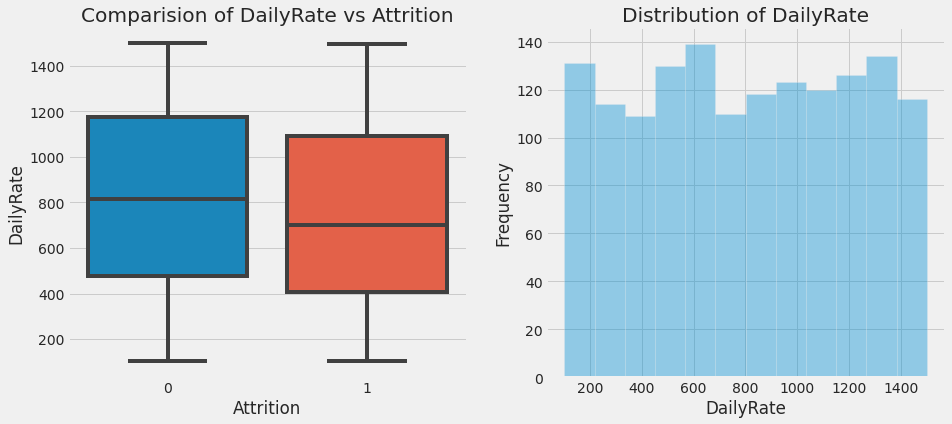

In [116]:
#Analyzing the daily wage rate vs employee left the company or not

NumericalVariables_targetPlots(data,"DailyRate")

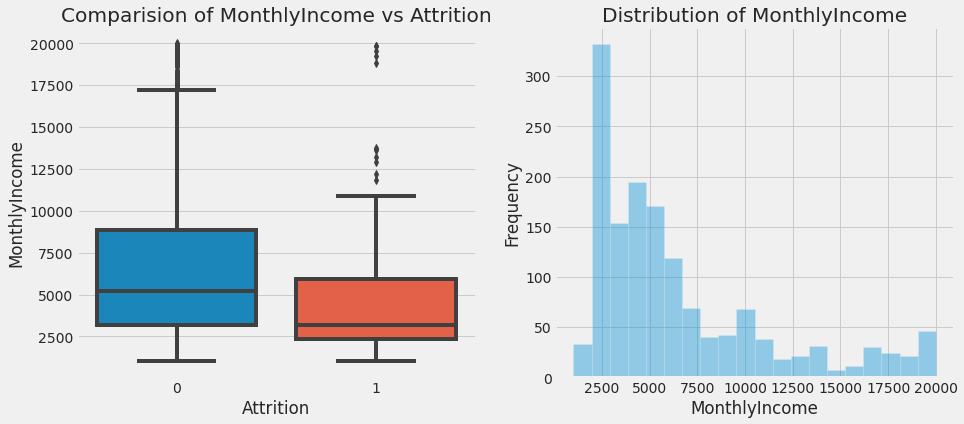

In [117]:
NumericalVariables_targetPlots(data,"MonthlyIncome")


- **Employee's working with lower daily rates are more prone to leave the company than compared to the employee's working with higher rates.** 
- **The same trend is resonated with monthly income too.**

## **Hourly Rate**

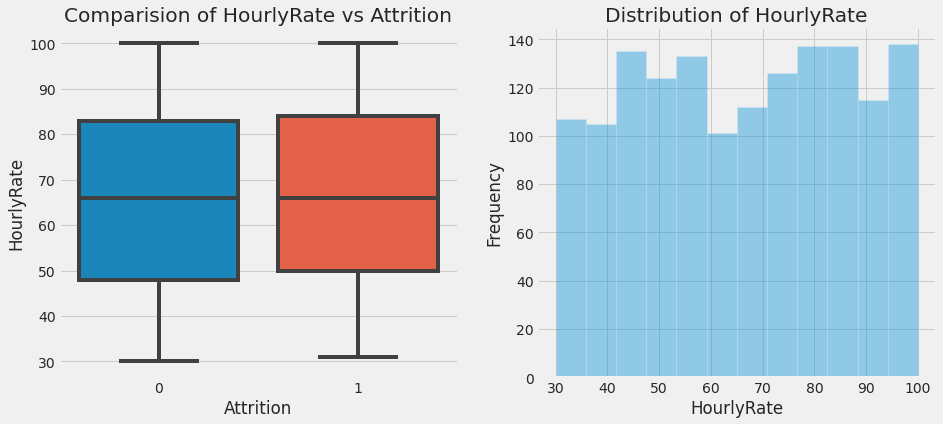

In [118]:
NumericalVariables_targetPlots(data,"HourlyRate")

- **From plot we have seen that there is no significant difference in the hourly rate and attrition. Therefore hourly rate is considered as not signifcant to attrition**


## **PercentSalaryHike**

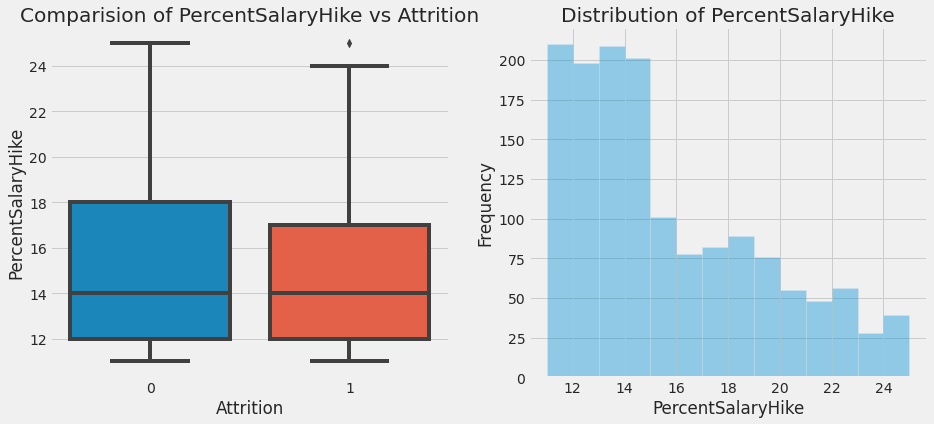

In [119]:
NumericalVariables_targetPlots(data,"PercentSalaryHike")


- **Majority (60% of total strength) of employee's receive 16% salary hike in the company, employee's who received less salary hike have left the company.**

## **Total Working years**

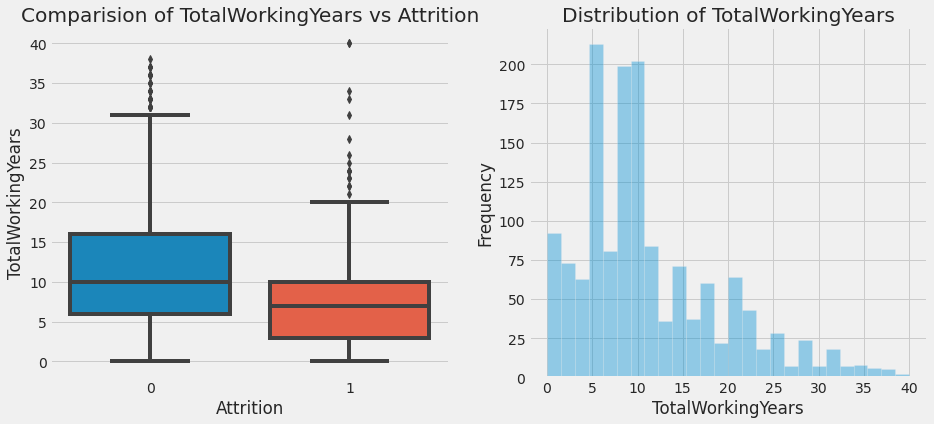

In [120]:
NumericalVariables_targetPlots(data,"TotalWorkingYears")

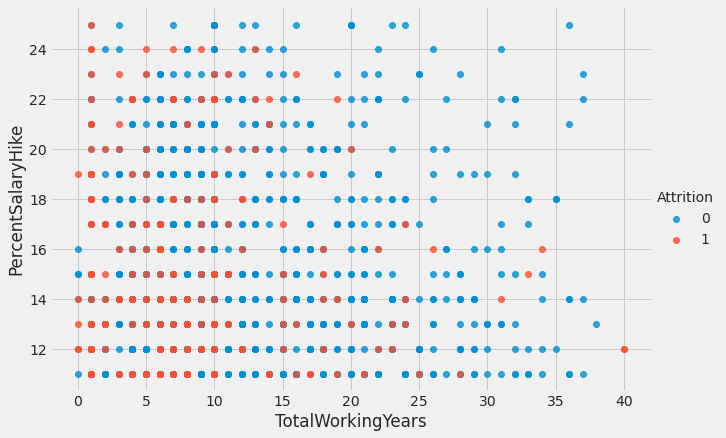

In [121]:
sns.lmplot(x = "TotalWorkingYears", y = "PercentSalaryHike", data=data,fit_reg=False,hue="Attrition",size=6,
           aspect=1.5)

plt.show()

- **Employee's with less working years have received 25% Salary hike when they switch to another company, but there is no linear relationship between working years and salary hike.**
- **Attrition is not seen amomg the employee's having more than 20 years of experience if their salary hike is more than 20%, even if the salary hike is below 20% attrition rate among the employee's is very low.**
- **Employee's with lesser years of experience are prone to leave the company in search of better pay, irrespective of salary hike**

## **Distance From Home**

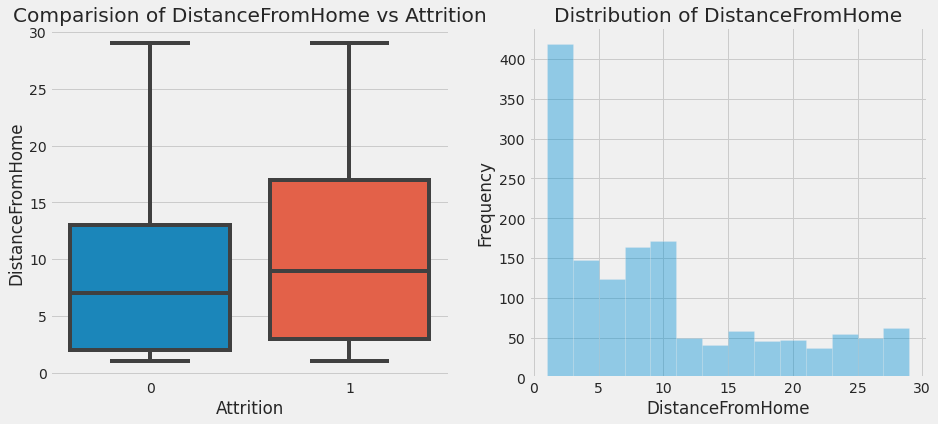

In [122]:
NumericalVariables_targetPlots(data,"DistanceFromHome")

- **There is a higher number of people who reside near to offices and hence the attrition levels are lower for distance less than 10. With increase in distance from home, attrition rate also increases**

##  **Analyizing the variables**
- **Categorical Variables**

## **Job Involvement**

In [123]:
#cross tabulation between attrition and JobInvolvement
pd.crosstab(data.JobInvolvement,data.Attrition)

Attrition,0,1
JobInvolvement,,
1,55,28
2,304,71
3,743,125
4,131,13


In [124]:
#calculating the percentage of people having different job involvement rate
round(data.JobInvolvement.value_counts()/data.shape[0] * 100,2)

3   59.05
2   25.51
4    9.80
1    5.65
Name: JobInvolvement, dtype: float64

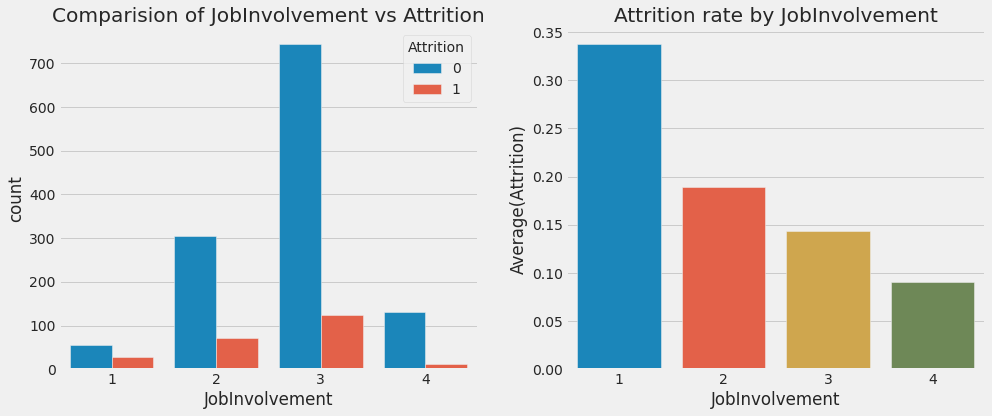

In [125]:
CategoricalVariables_targetPlots(data,"JobInvolvement")

- **In the total data set, 59% have high job involvement whereas 25% have medium involvement rate.**
- **From above plot we can observe that round 50% of people in low job involvement (level 1 & 2) have left the company.**
- **Even the people who have high job involmenent have higher attrition rate around 15% in that category have left company.**


## **JobSatisfaction**

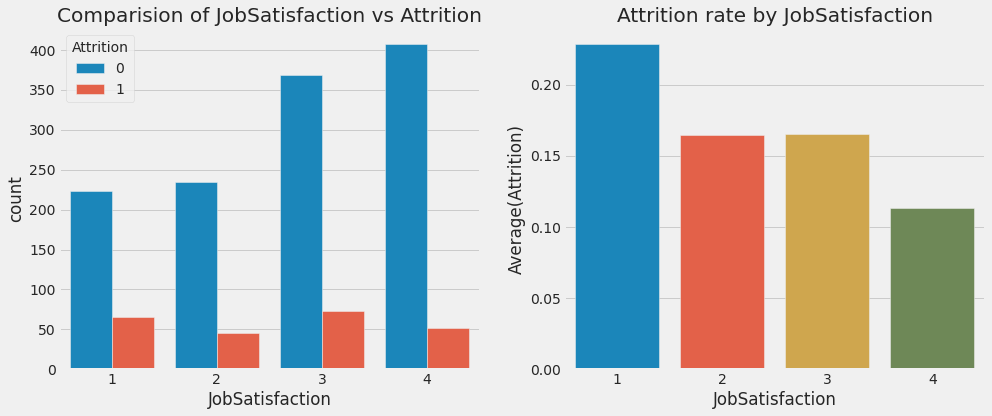

In [126]:
CategoricalVariables_targetPlots(data,"JobSatisfaction")

**As expected, people with low satisfaction have left the company around 23% in that category. what surprising is out of the people who rated medium and high job satisfaction around 32% has left the company. There should be some other factor which triggers their exit from the company**

## **Performance Rating**

In [127]:
#checking the number of categories under performance rating
data.PerformanceRating.value_counts()

3    1244
4     226
Name: PerformanceRating, dtype: int64

In [128]:
#calculate the percentage of performance rating per category in the whole dataset
round(data.PerformanceRating.value_counts()/data.shape[0] * 100,2)

3   84.63
4   15.37
Name: PerformanceRating, dtype: float64

**Around 85% of people in the company rated as Excellent and remaining 15% rated as Outstanding.**

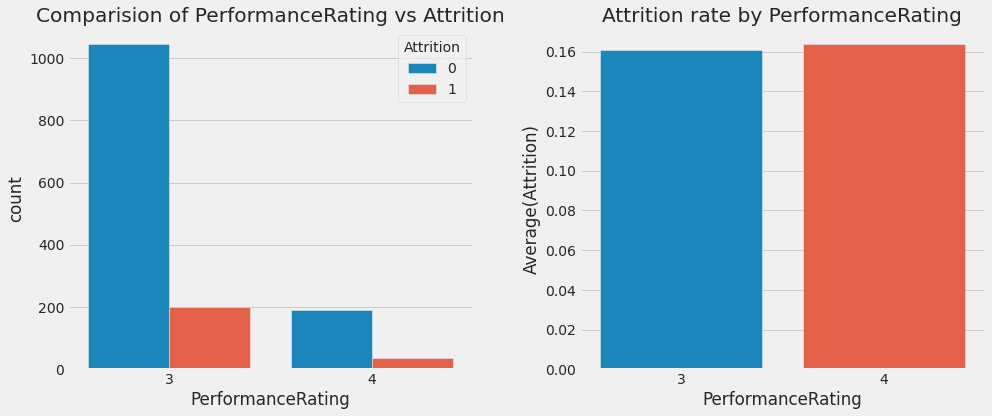

In [129]:
CategoricalVariables_targetPlots(data,"PerformanceRating")


**Contrary to normal belief that employee's having higher rating will not leave the company. It may be seen that there is no significant difference between the performance rating and Attrition Rate.**

## **RelationshipSatisfaction**

In [130]:
#percentage of each relationship satisfaction category across the data
round(data.RelationshipSatisfaction.value_counts()/data.shape[0],2)

3   0.31
4   0.29
2   0.21
1   0.19
Name: RelationshipSatisfaction, dtype: float64

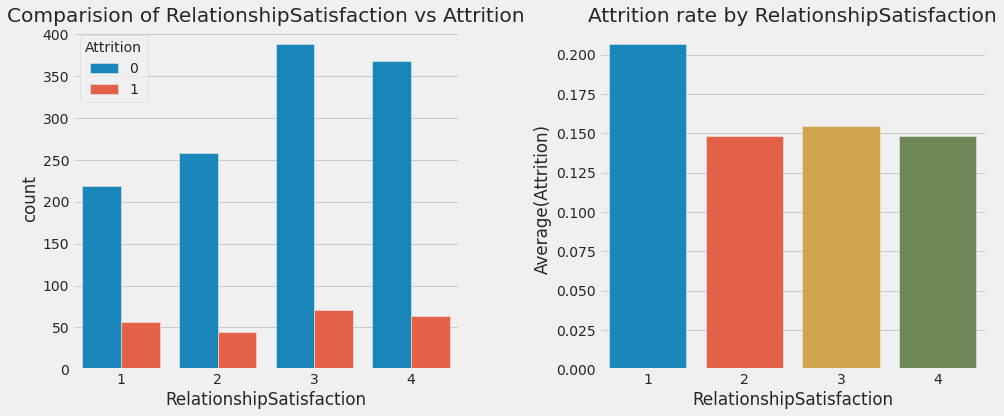

In [131]:
CategoricalVariables_targetPlots(data,"RelationshipSatisfaction")

**In this too, we found that almost 30% of employees with high and very high RelationshipSatisfaction have left the company. Here also there is no visible trend among the relationshipsatisfaction and attrition rate**

## **WorkLifeBalance**

In [132]:
#percentage of worklife balance rating across the company data
round(data.WorkLifeBalance.value_counts()/data.shape[0],2)

3   0.61
2   0.23
4   0.10
1   0.05
Name: WorkLifeBalance, dtype: float64

**More than 60% of the employee's rated that they have Better worklife balance and 10% rated for Best worklife balance**

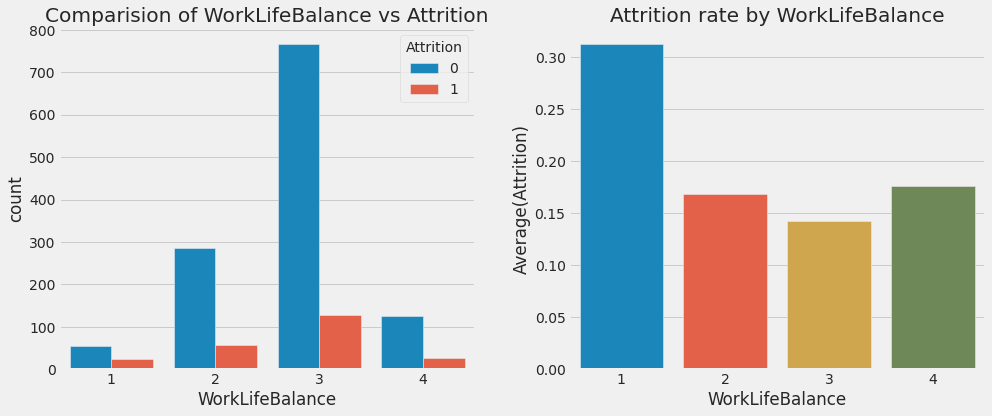

In [133]:
CategoricalVariables_targetPlots(data,"WorkLifeBalance")


**As expected more than 30% of the people who rated as Bad WorkLifeBalance have left the company and around 15% of the people who rated for Best WorkLifeBalance also left the company**

## **OverTime**

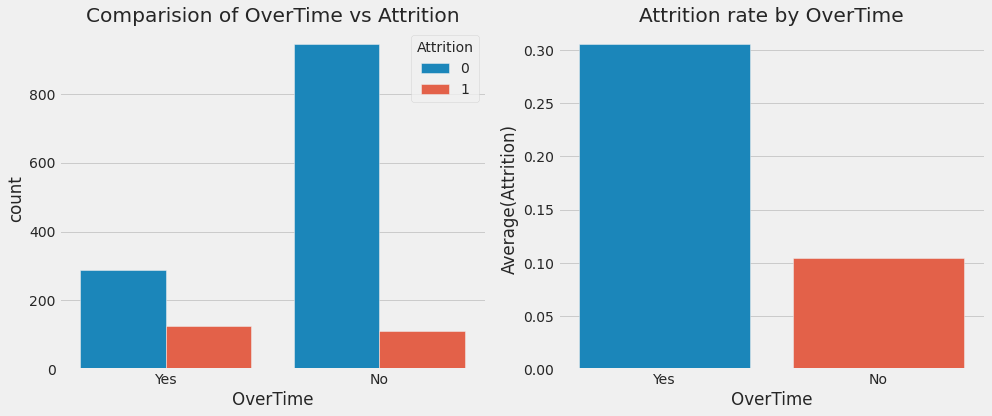

In [134]:
CategoricalVariables_targetPlots(data,"OverTime")


**More than 30% of employee's who worked overtime has left the company, where as 90% of employee's who have not experienced overtime has not left the company. Therefore overtime is a strong indicator of attrition**

## **BusinessTravel**

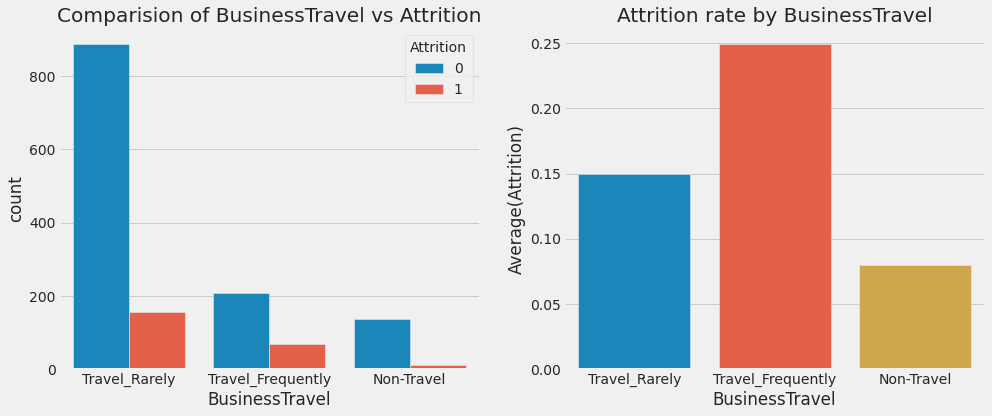

In [135]:
CategoricalVariables_targetPlots(data,segment_by="BusinessTravel")


**There are more people who travel rarely compared to people who travel frequently. In case of people who travel Frequently around 25% of people have left the company and in other cases attrition rate doesn't vary significantly on travel**

## **Department**

In [136]:
data.Department.value_counts()


Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

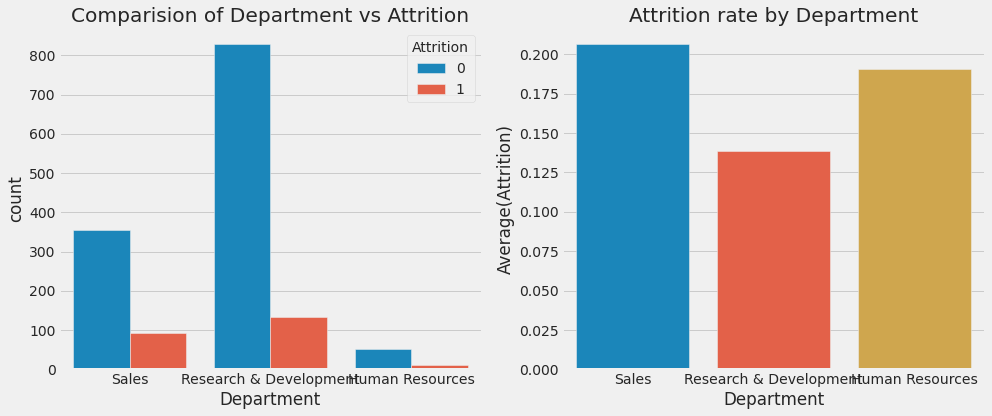

In [137]:
CategoricalVariables_targetPlots(data,segment_by="Department")


- **On comparing departmentwise,we can conclude that HR has seen only a marginal high in turnover rates whereas the numbers are significant in sales department with turnover rates of 39 %. The attrition levels are not appreciable in R & D where 67 % have recorded no attrition.**
- **Sales has seen higher attrition levels about 20.6% followed by HR around 18%**

## **EducationField**

In [138]:
data.EducationField.value_counts()


Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

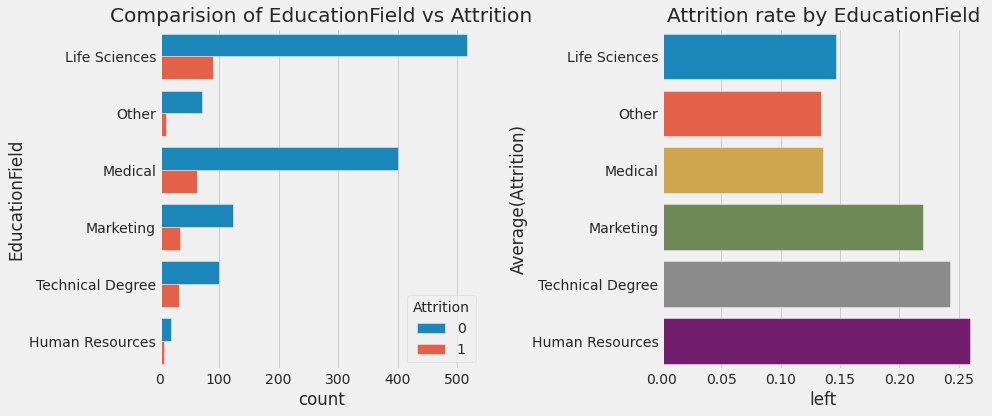

In [139]:
CategoricalVariables_targetPlots(data,"EducationField",invert_axis=True)


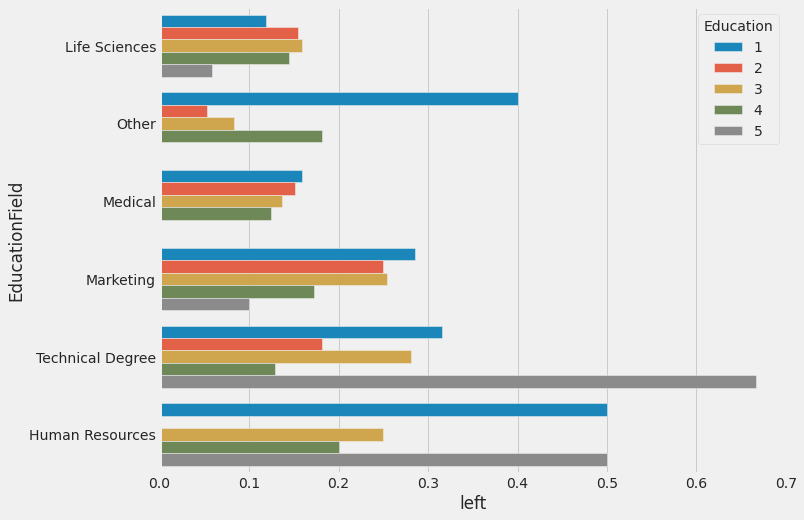

In [140]:
plt.figure(figsize=(10,8))
sns.barplot(y = "EducationField", x = "left", hue="Education", data=data,ci=None)
plt.show()

- **There are more people with a Life sciences followed by medical and marketing.**
- **Employee's in the EducationField of Human Resources and Technical Degree have highest attrition levels around 26% and 23% respectively.**
- **When compared with Education level, we have observed that employees in the highest level of education in there field of study have left the company. We can conclude that EducationField is a strong indicator of attrition**

## **EnvironmentSatisfaction**

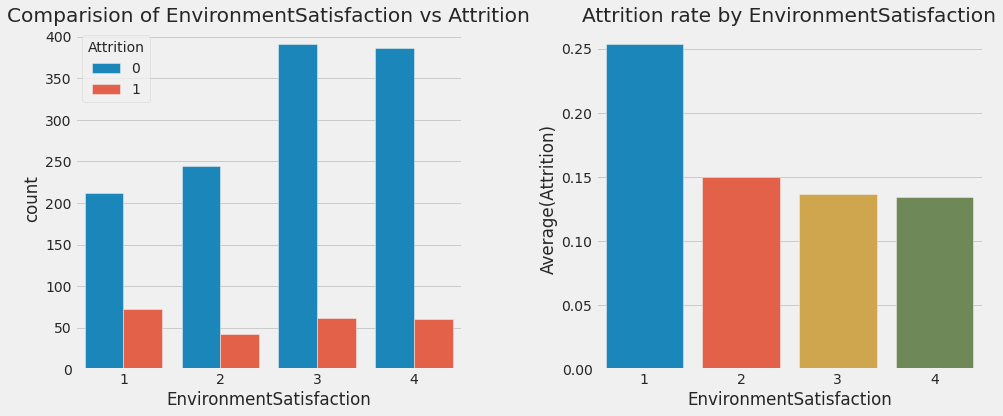

In [141]:
CategoricalVariables_targetPlots(data,"EnvironmentSatisfaction")


**We can see that people having low environment satisfaction 25% leave the company.**

## **Gender Vs Attrition**


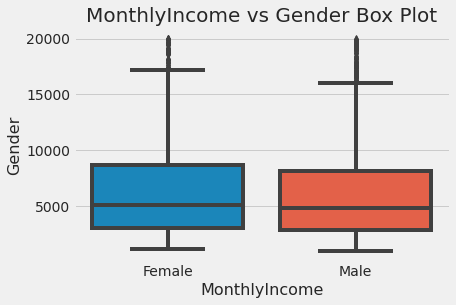

In [142]:
sns.boxplot(data['Gender'],data['MonthlyIncome'])
plt.title('MonthlyIncome vs Gender Box Plot', fontsize=20)      
plt.xlabel('MonthlyIncome', fontsize=16)
plt.ylabel('Gender', fontsize=16)
plt.show()

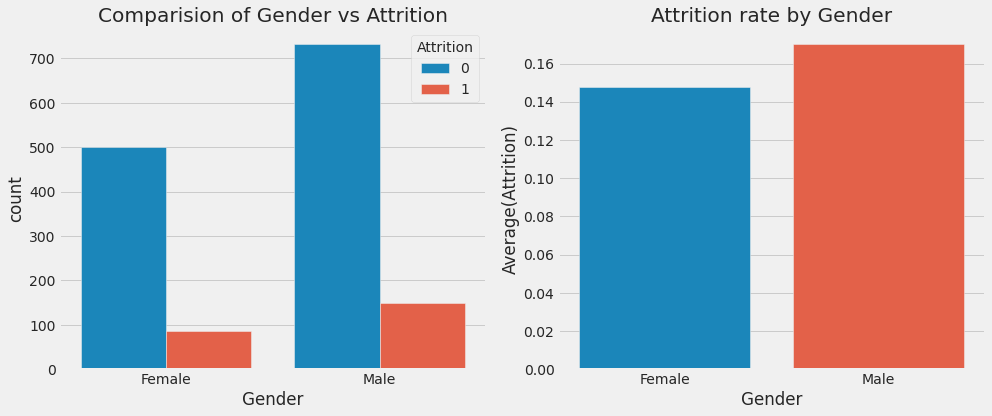

In [143]:
CategoricalVariables_targetPlots(data,"Gender")


**Monthly Income distribution for Male and Female is almost similar, so the attrition rate of Male and Female is almost the same around 15%. Gender is not a strong indicator of attrition**

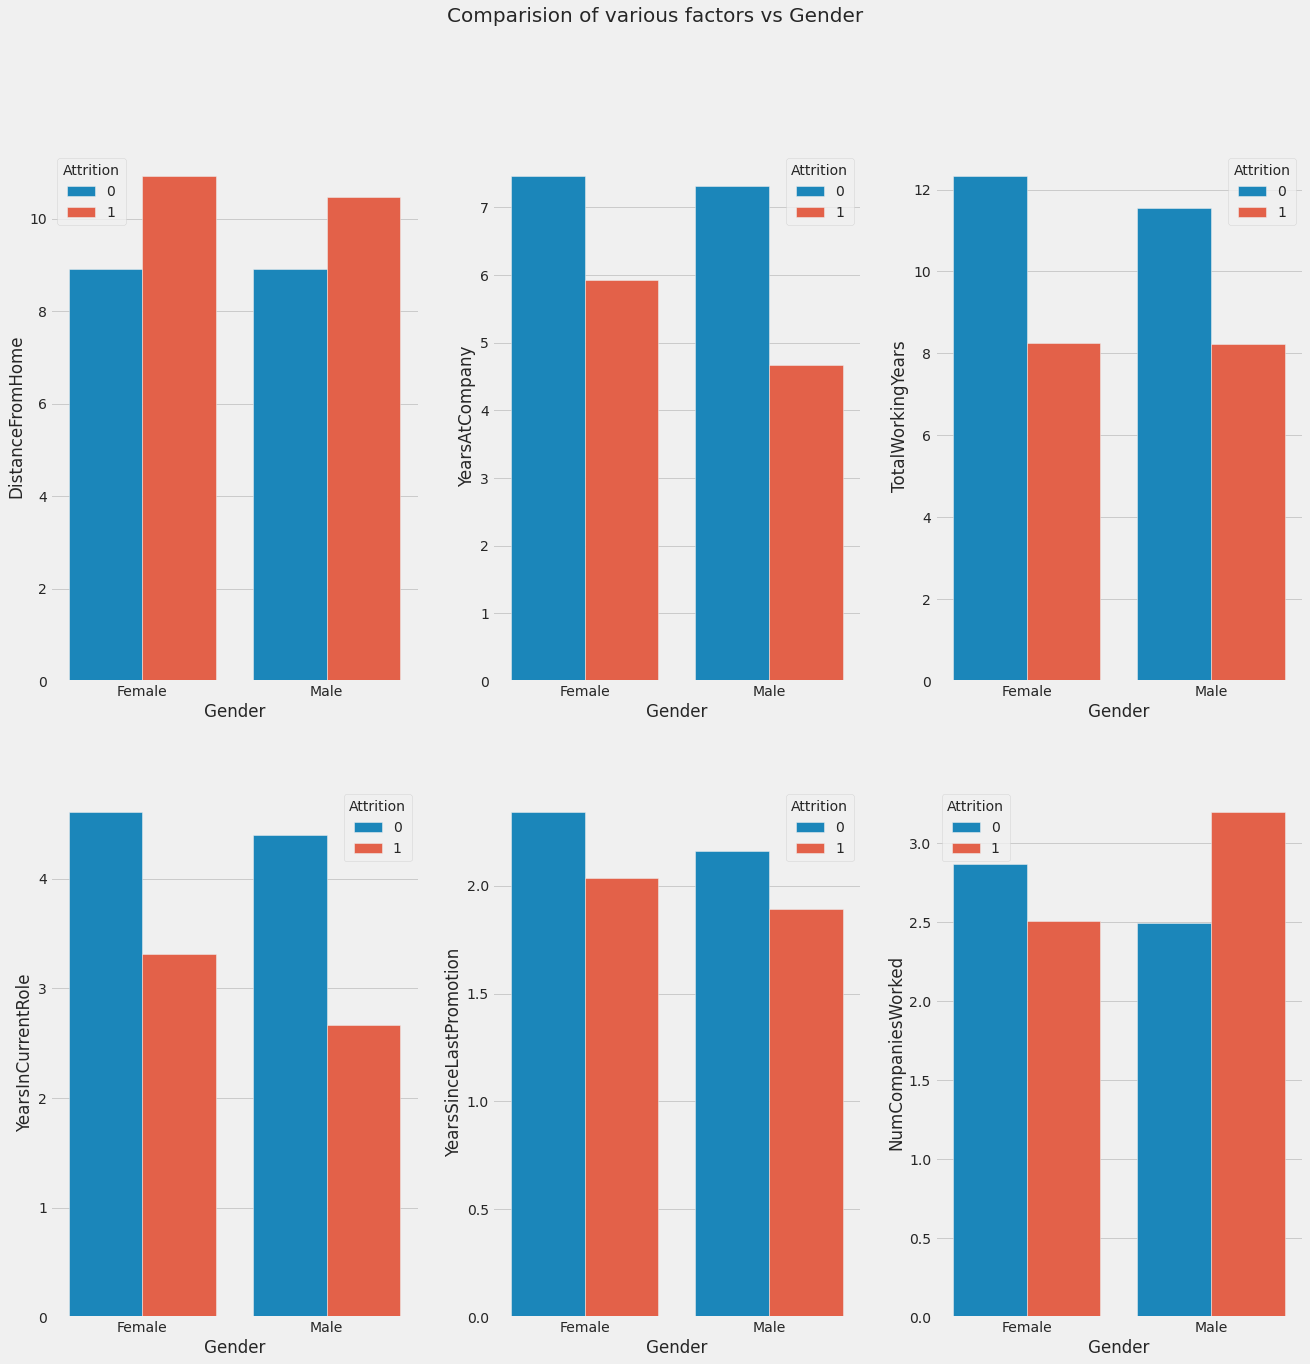

In [144]:
fig,ax = plt.subplots(2,3, figsize=(20,20))               # 'ax' has references to all the four axes
plt.suptitle("Comparision of various factors vs Gender", fontsize=20)
sns.barplot(data['Gender'],data['DistanceFromHome'],hue = data['Attrition'], ax = ax[0,0],ci=None); 
sns.barplot(data['Gender'],data['YearsAtCompany'],hue = data['Attrition'], ax = ax[0,1],ci=None); 
sns.barplot(data['Gender'],data['TotalWorkingYears'],hue = data['Attrition'], ax = ax[0,2],ci=None); 
sns.barplot(data['Gender'],data['YearsInCurrentRole'],hue = data['Attrition'], ax = ax[1,0],ci=None); 
sns.barplot(data['Gender'],data['YearsSinceLastPromotion'],hue = data['Attrition'], ax = ax[1,1],ci=None); 
sns.barplot(data['Gender'],data['NumCompaniesWorked'],hue = data['Attrition'], ax = ax[1,2],ci=None); 
plt.show()

- **Distance from home matters to women employees more than men.**
- **Female employes are spending more years in one company compare to their counterpart.**
- **Female employes spending more years in current company are more inclined to switch.**

## **Job Role**

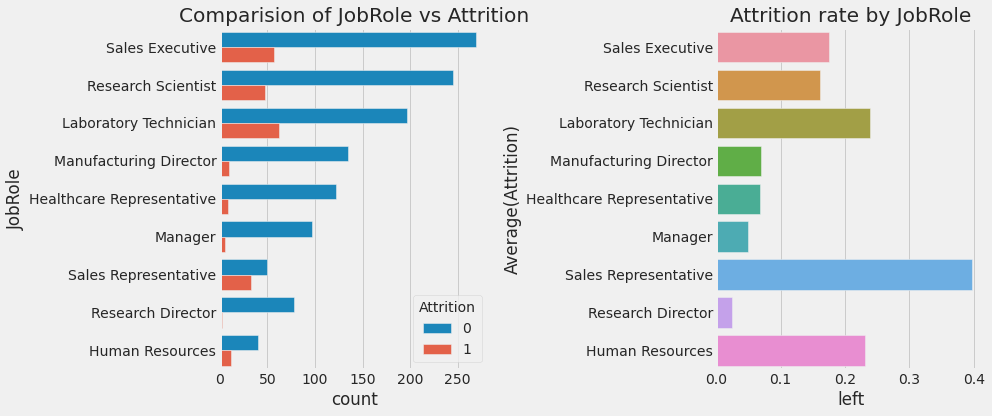

In [145]:
CategoricalVariables_targetPlots(data,"JobRole",invert_axis=True)


- **Jobs held by the employee is maximum in Sales Executive, then R&D , then Laboratory Technician**
- **People working in Sales department is most likely quit the company followed by Laboratory Technician and Human Resources there attrition rates are 40%, 24% and 22% respectively**

## **Marital Status**

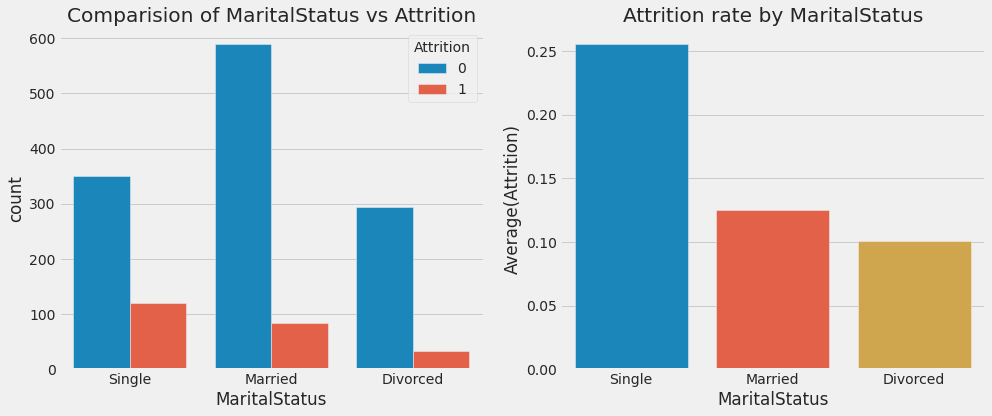

In [146]:
CategoricalVariables_targetPlots(data,"MaritalStatus")

**From the plot,it is understood that irrespective of the marital status,there are large people who stay with the company and do not leave.Therefore,marital status is a weak predictor of attrition**

# **Correlation Matrix**

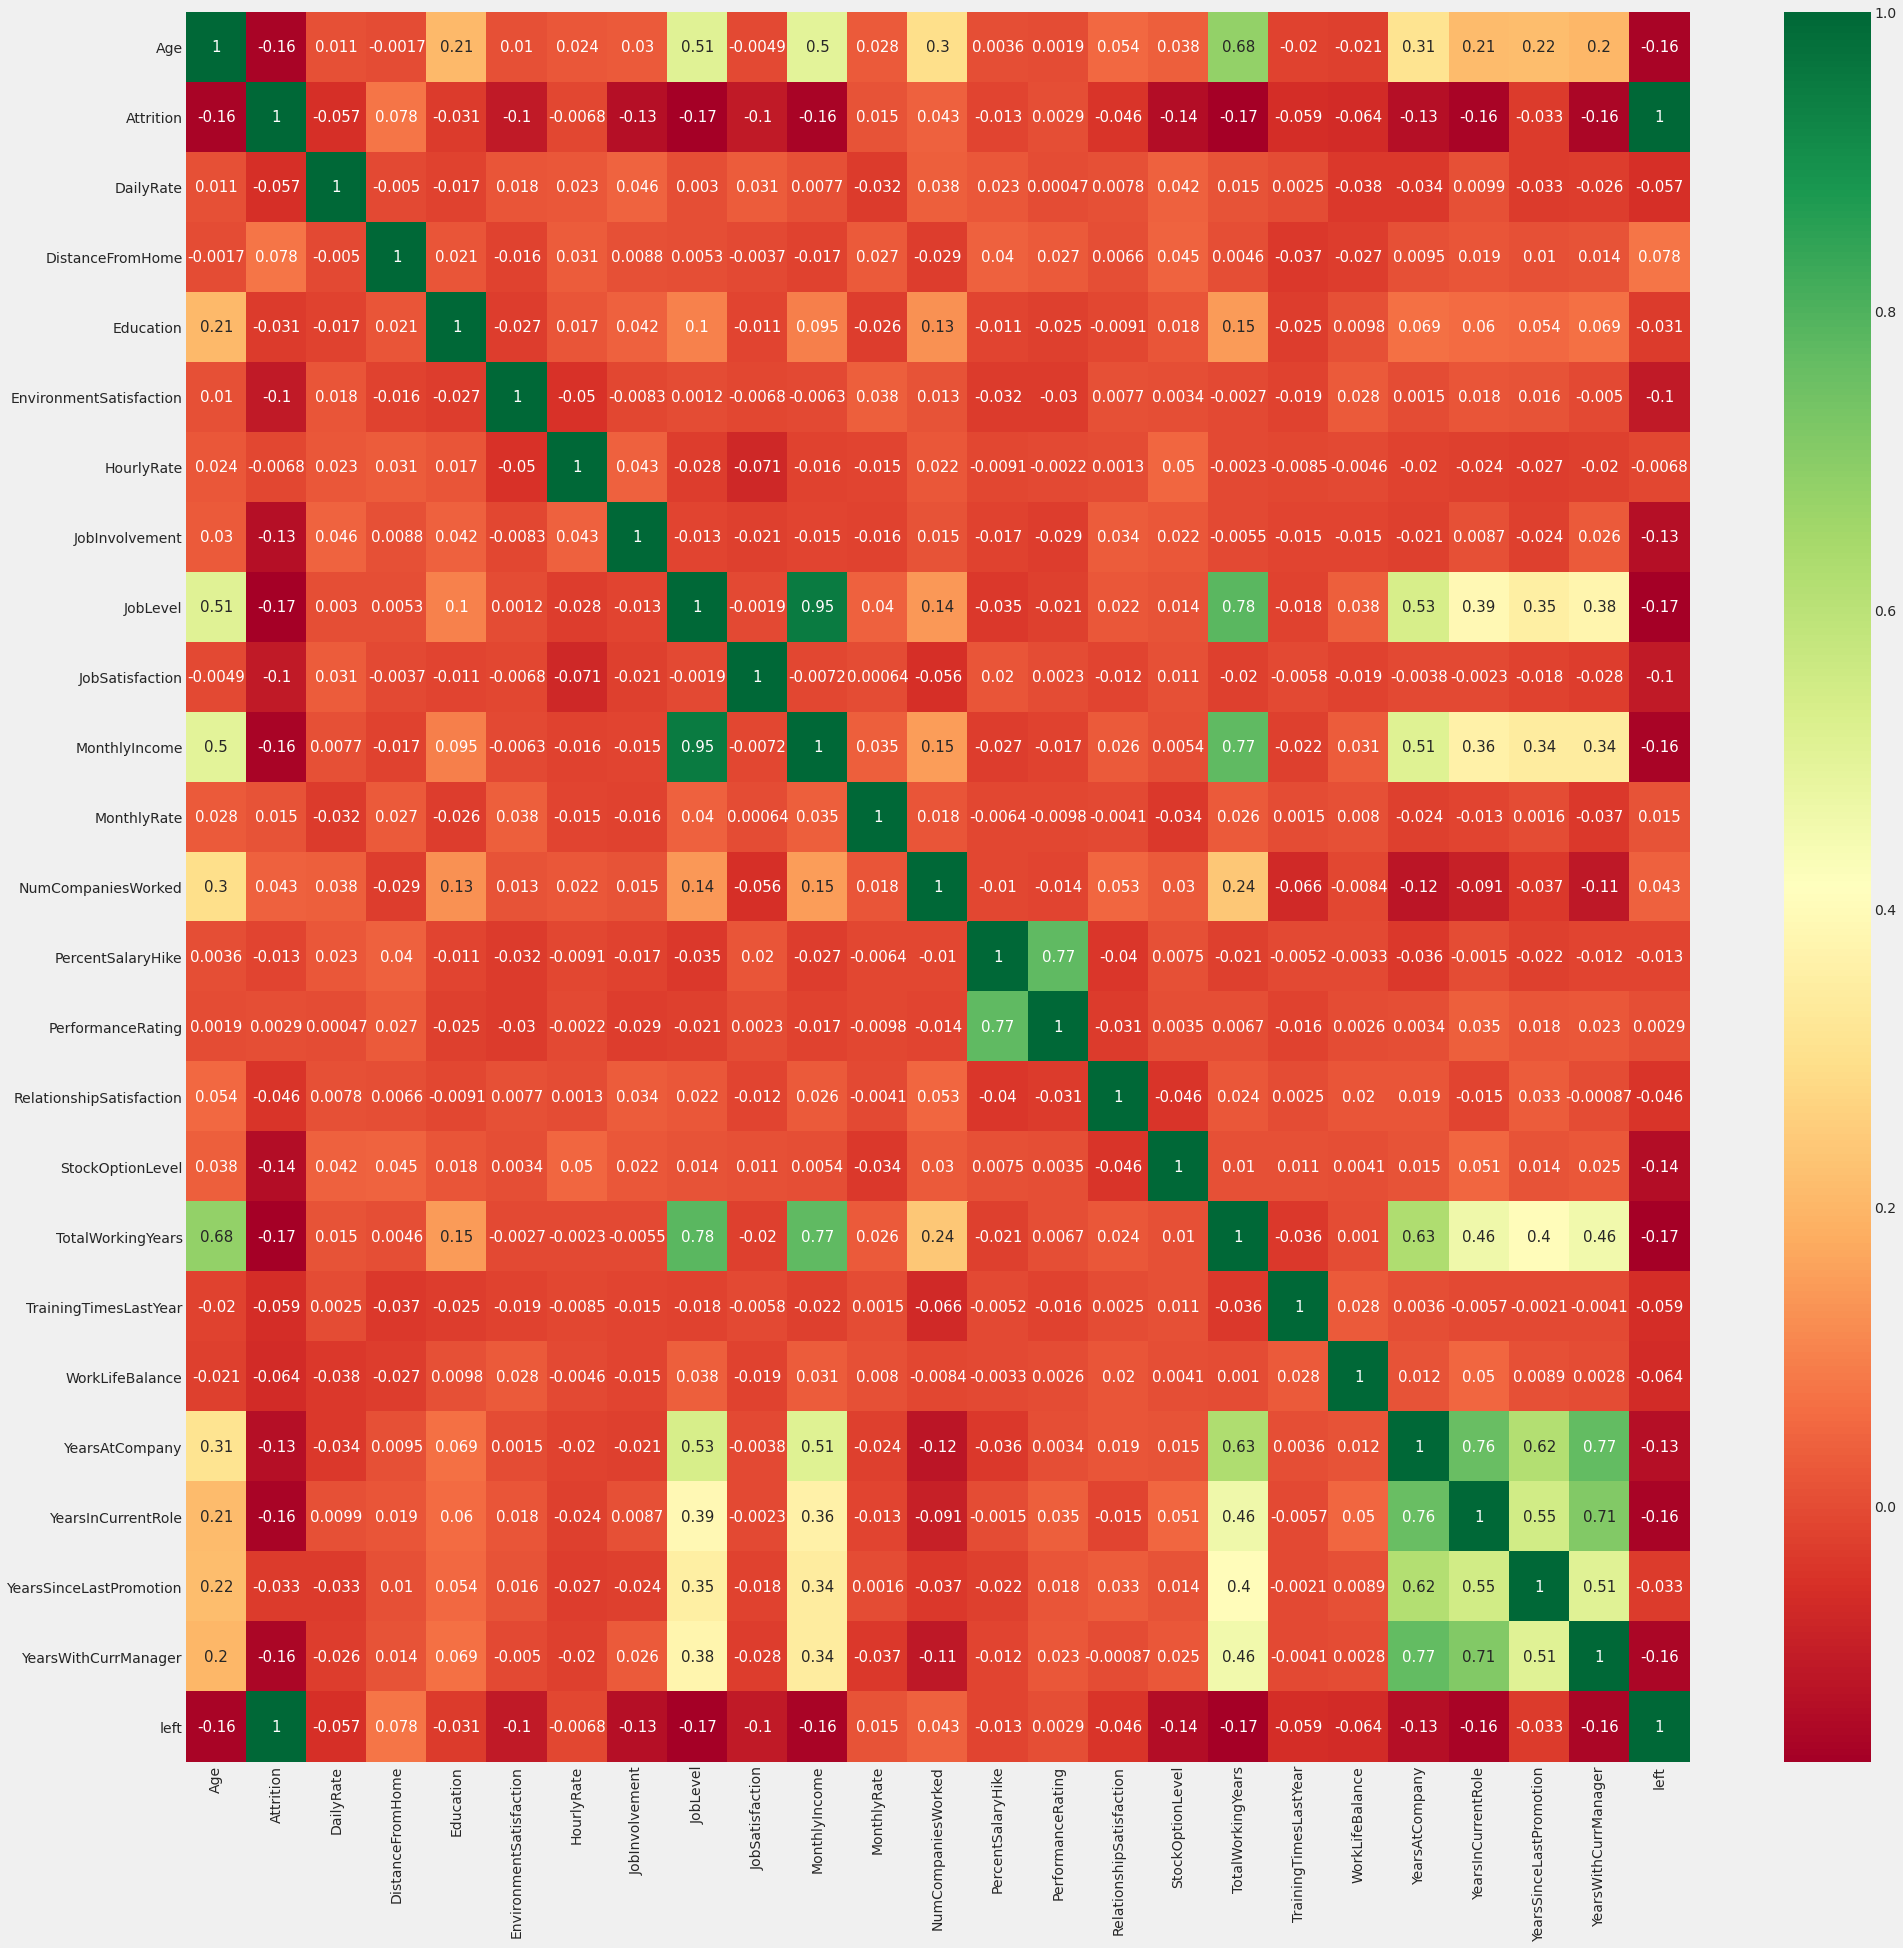

In [147]:
plt.figure(figsize=(30, 30))
sns.heatmap(data.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})

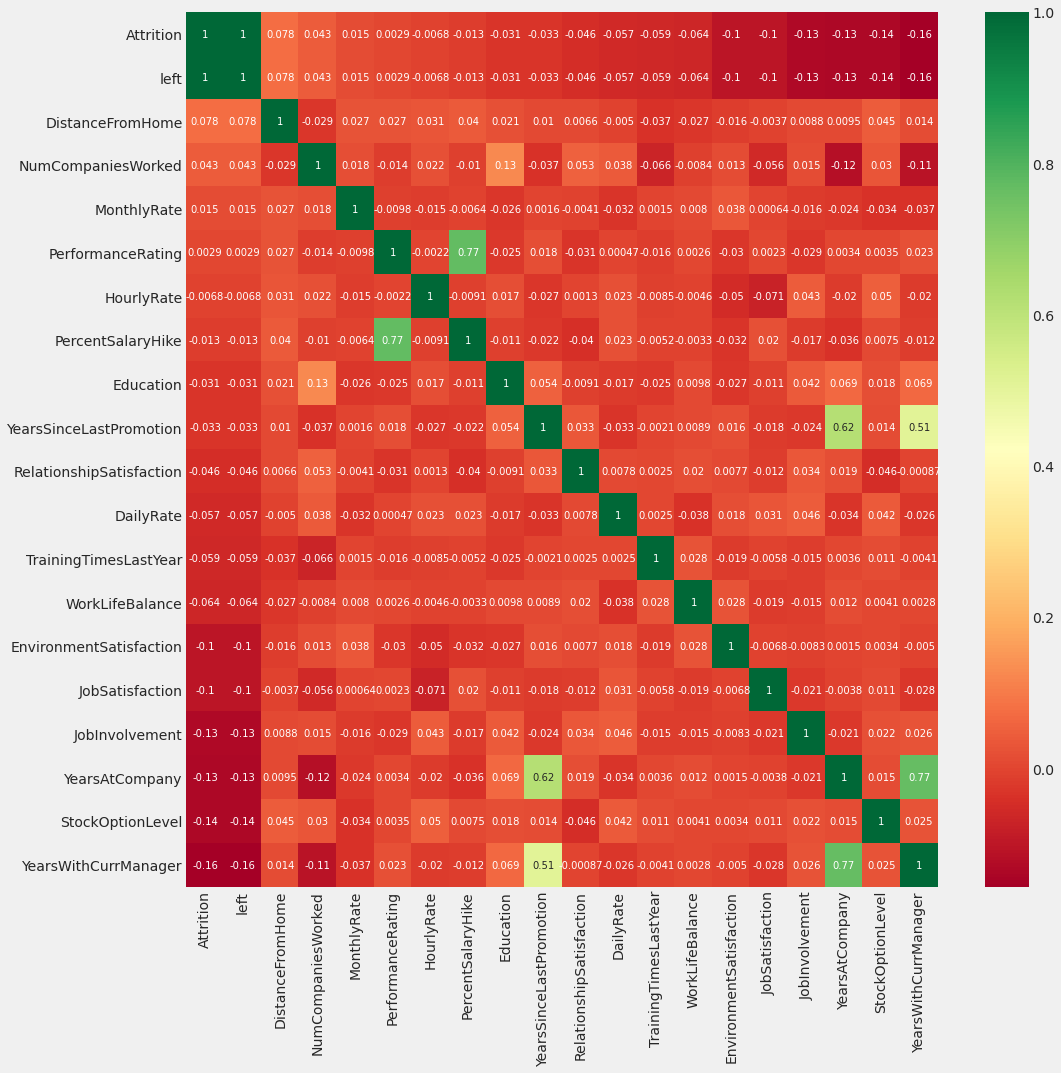

In [148]:
col = data.corr().nlargest(20, "Attrition").Attrition.index
plt.figure(figsize=(15, 15))
sns.heatmap(data[col].corr(), annot=True, cmap="RdYlGn", annot_kws={"size":10})

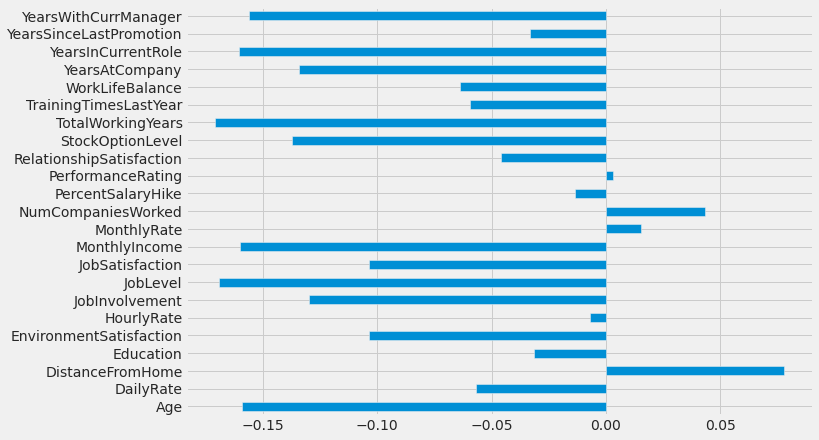

In [149]:
data.drop('left',axis=1,inplace=True)
data.drop('Attrition', axis=1).corrwith(data.Attrition).plot(kind='barh', figsize=(10, 7))


## Analysis of correlation results (sample analysis):

- **Monthly income is highly correlated with Job level.**
- **Job level is highly correlated with total working hours.**
- **Monthly income is highly correlated with total working hours.**
- **Age is also positively correlated with the Total working hours.**
- **Marital status and stock option level are negatively correlated.**

# Data Processing

In [150]:
# Transform categorical data into dummies
dummy_col = [column for column in data.drop('Attrition', axis=1).columns if data[column].nunique() < 20]
data = pd.get_dummies(data, columns=dummy_col, drop_first=True, dtype='uint8')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Columns: 136 entries, Age to YearsWithCurrManager_17
dtypes: int64(9), uint8(127)
memory usage: 285.8 KB


In [151]:
print(data.shape)

# Remove duplicate Features
data = data.T.drop_duplicates()
data = data.T

# Remove Duplicate Rows
data.drop_duplicates(inplace=True)

print(data.shape)

(1470, 136)
(1470, 136)


In [152]:
data.shape

(1470, 136)

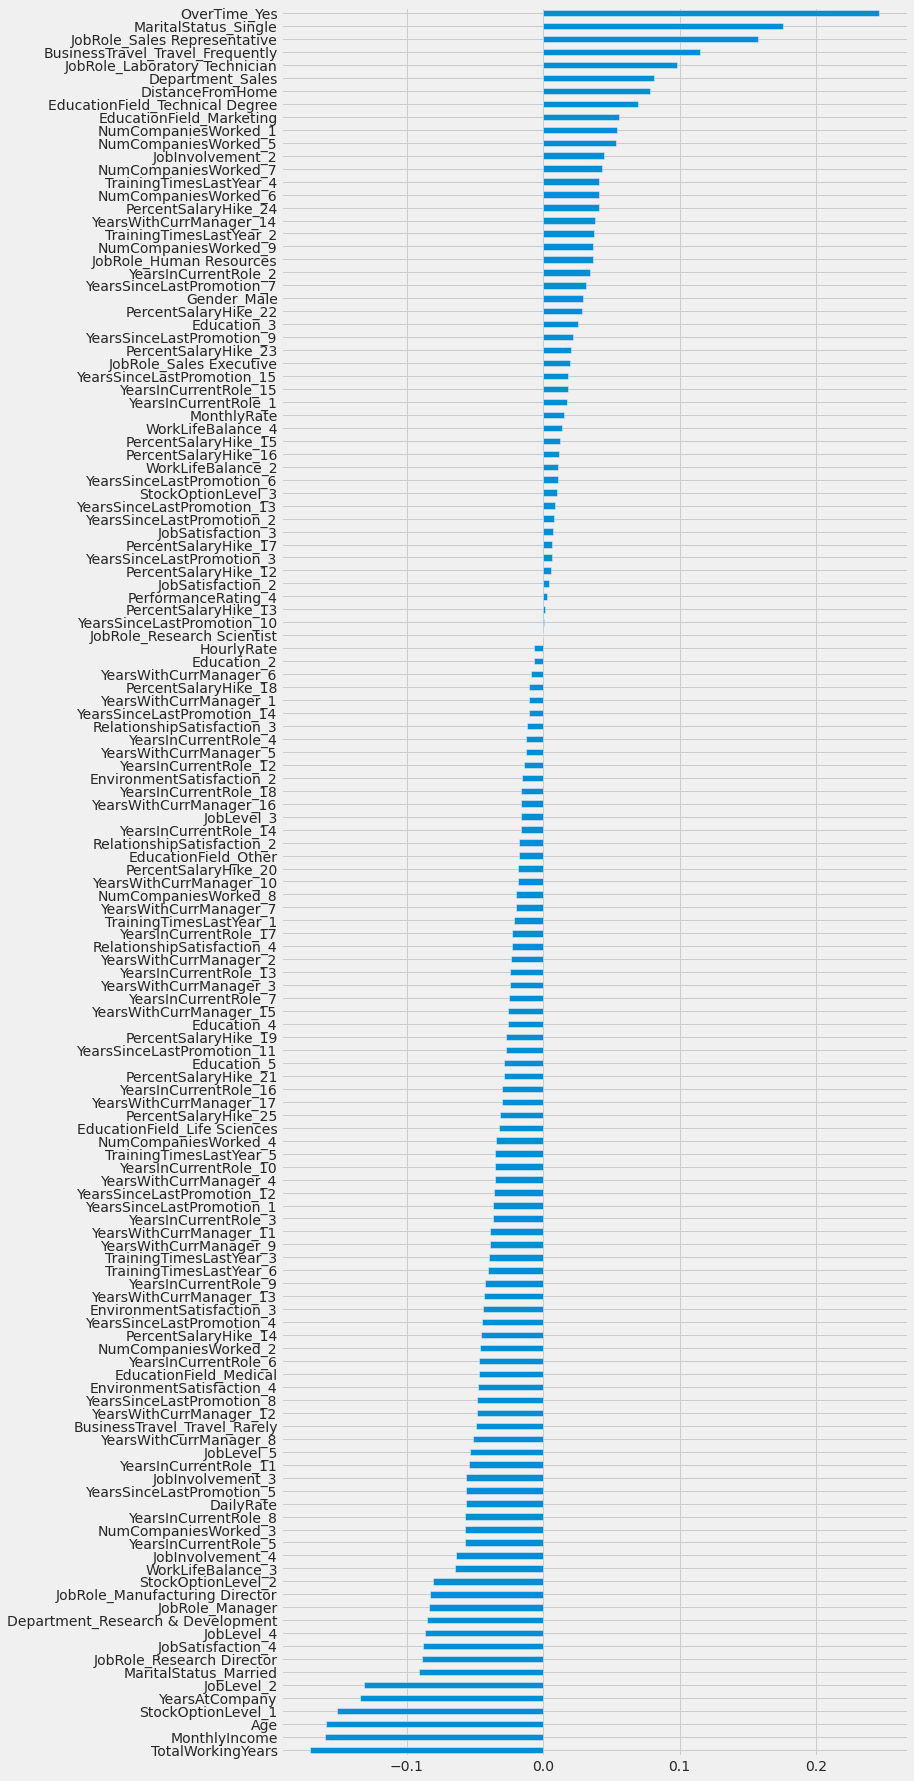

In [153]:
data.drop('Attrition', axis=1).corrwith(data.Attrition).sort_values().plot(kind='barh', figsize=(10, 30))

In [154]:
feature_correlation = data.drop('Attrition', axis=1).corrwith(data.Attrition).sort_values()
model_col = feature_correlation[np.abs(feature_correlation) > 0.02].index
len(model_col)

92

# Applying machine learning algorithms.

In [155]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = data.drop('Attrition', axis=1)
y = data.Attrition

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,
                                                    stratify=y)

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)
X_std = scaler.transform(X)

In [156]:
def feature_imp(data, model):
    fi = pd.DataFrame()
    fi["feature"] = data.columns
    fi["importance"] = model.feature_importances_
    return fi.sort_values(by="importance", ascending=False)

## What defines success?
**We have an imbalanced data, so if we predict that all our employees will stay we'll have an accuracy of 83.90%**.

In [157]:
y_test.value_counts()[0] / y_test.shape[0]


0.8390022675736961

In [158]:
stay = (y_train.value_counts()[0] / y_train.shape)[0]
leave = (y_train.value_counts()[1] / y_train.shape)[0]

print("===============TRAIN=================")
print(f"Staying Rate: {stay * 100:.2f}%")
print(f"Leaving Rate: {leave * 100 :.2f}%")

stay = (y_test.value_counts()[0] / y_test.shape)[0]
leave = (y_test.value_counts()[1] / y_test.shape)[0]

print("===============TEST=================")
print(f"Staying Rate: {stay * 100:.2f}%")
print(f"Leaving Rate: {leave * 100 :.2f}%")

===============TRAIN=================
Staying Rate: 83.87%
Leaving Rate: 16.13%
===============TEST=================
Staying Rate: 83.90%
Leaving Rate: 16.10%


In [159]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print("Classification Report:", end='')
        print(f"\tPrecision Score: {precision_score(y_train, pred) * 100:.2f}%")
        print(f"\t\t\tRecall Score: {recall_score(y_train, pred) * 100:.2f}%")
        print(f"\t\t\tF1 score: {f1_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print("Classification Report:", end='')
        print(f"\tPrecision Score: {precision_score(y_test, pred) * 100:.2f}%")
        print(f"\t\t\tRecall Score: {recall_score(y_test, pred) * 100:.2f}%")
        print(f"\t\t\tF1 score: {f1_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

# Logistic Regression

In [160]:
from sklearn.linear_model import LogisticRegression

lr_classifier = LogisticRegression(solver='liblinear', penalty='l1')
lr_classifier.fit(X_train_std, y_train)

print_score(lr_classifier, X_train_std, y_train, X_test_std, y_test, train=True)
print_score(lr_classifier, X_train_std, y_train, X_test_std, y_test, train=False)

Train Result:
Accuracy Score: 92.91%
_______________________________________________
Classification Report:	Precision Score: 88.43%
			Recall Score: 64.46%
			F1 score: 74.56%
_______________________________________________
Confusion Matrix: 
 [[849  14]
 [ 59 107]]

Test Result:
Accuracy Score: 85.26%
_______________________________________________
Classification Report:	Precision Score: 56.00%
			Recall Score: 39.44%
			F1 score: 46.28%
_______________________________________________
Confusion Matrix: 
 [[348  22]
 [ 43  28]]



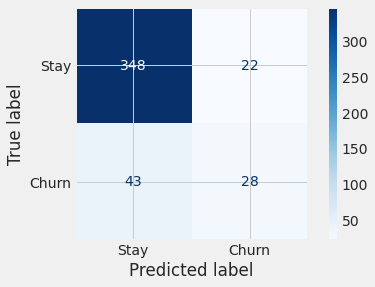

In [161]:
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve

disp = plot_confusion_matrix(lr_classifier, X_test_std, y_test, 
                             cmap='Blues', values_format='d', 
                             display_labels=['Stay', 'Churn'])

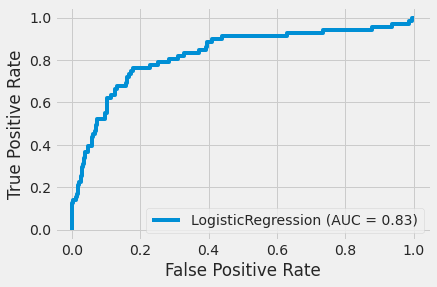

In [162]:
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve
disp = plot_roc_curve(lr_classifier, X_test_std, y_test)


# Random Forest Classifier

In [163]:
from sklearn.ensemble import RandomForestClassifier

rand_forest = RandomForestClassifier(n_estimators=1200, 
#                                      bootstrap=False,
#                                      class_weight={0:stay, 1:leave}
                                    )
rand_forest.fit(X_train, y_train)

print_score(rand_forest, X_train, y_train, X_test, y_test, train=True)
print_score(rand_forest, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
Classification Report:	Precision Score: 100.00%
			Recall Score: 100.00%
			F1 score: 100.00%
_______________________________________________
Confusion Matrix: 
 [[863   0]
 [  0 166]]

Test Result:
Accuracy Score: 84.13%
_______________________________________________
Classification Report:	Precision Score: 53.33%
			Recall Score: 11.27%
			F1 score: 18.60%
_______________________________________________
Confusion Matrix: 
 [[363   7]
 [ 63   8]]



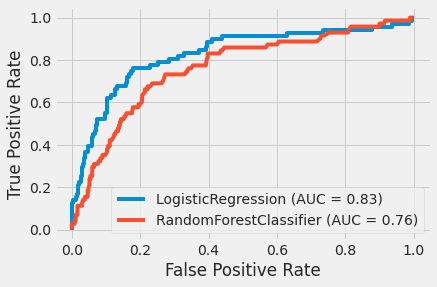

In [164]:
disp = plot_roc_curve(lr_classifier, X_test_std, y_test)
plot_roc_curve(rand_forest, X_test, y_test, ax=disp.ax_)

Text(0.5, 1.0, 'Feature Importance according to Random Forest')

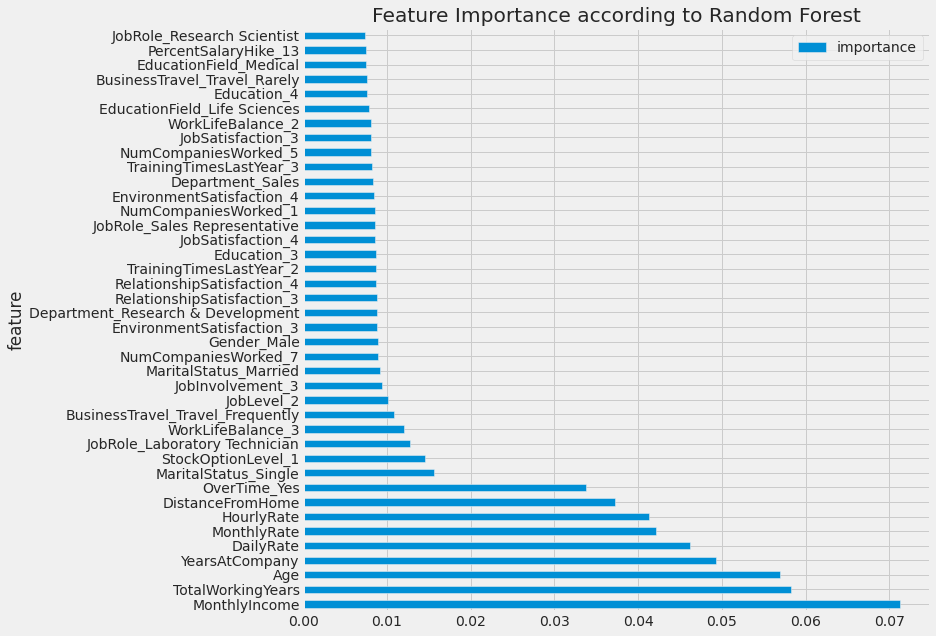

In [165]:
df = feature_imp(X, rand_forest)[:40]
df.set_index('feature', inplace=True)
df.plot(kind='barh', figsize=(10, 10))
plt.title('Feature Importance according to Random Forest')

# Support Vector Machine

In [166]:
from sklearn.svm import SVC

svc = SVC(kernel='linear')
svc.fit(X_train_std, y_train)

print_score(svc, X_train_std, y_train, X_test_std, y_test, train=True)
print_score(svc, X_train_std, y_train, X_test_std, y_test, train=False)

Train Result:
Accuracy Score: 94.66%
_______________________________________________
Classification Report:	Precision Score: 93.70%
			Recall Score: 71.69%
			F1 score: 81.23%
_______________________________________________
Confusion Matrix: 
 [[855   8]
 [ 47 119]]

Test Result:
Accuracy Score: 84.35%
_______________________________________________
Classification Report:	Precision Score: 51.92%
			Recall Score: 38.03%
			F1 score: 43.90%
_______________________________________________
Confusion Matrix: 
 [[345  25]
 [ 44  27]]



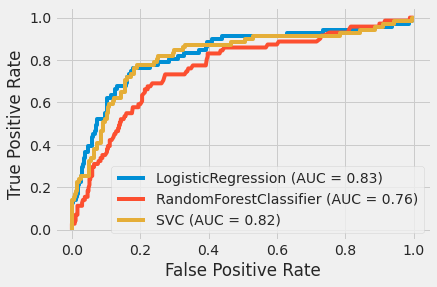

In [167]:
disp = plot_roc_curve(lr_classifier, X_test_std, y_test)
plot_roc_curve(rand_forest, X_test, y_test, ax=disp.ax_)
plot_roc_curve(svc, X_test_std, y_test, ax=disp.ax_)


# XGBoost Classifier

In [168]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)

print_score(xgb_clf, X_train, y_train, X_test, y_test, train=True)
print_score(xgb_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 94.07%
_______________________________________________
Classification Report:	Precision Score: 100.00%
			Recall Score: 63.25%
			F1 score: 77.49%
_______________________________________________
Confusion Matrix: 
 [[863   0]
 [ 61 105]]

Test Result:
Accuracy Score: 85.49%
_______________________________________________
Classification Report:	Precision Score: 61.29%
			Recall Score: 26.76%
			F1 score: 37.25%
_______________________________________________
Confusion Matrix: 
 [[358  12]
 [ 52  19]]



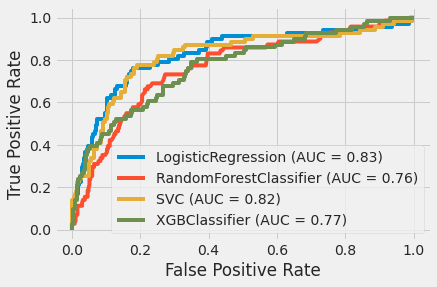

In [169]:
disp = plot_roc_curve(lr_classifier, X_test_std, y_test)
plot_roc_curve(rand_forest, X_test, y_test, ax=disp.ax_)
plot_roc_curve(svc, X_test_std, y_test, ax=disp.ax_)
plot_roc_curve(xgb_clf, X_test, y_test, ax=disp.ax_)

Text(0.5, 1.0, 'Feature Importance according to XGBoost')

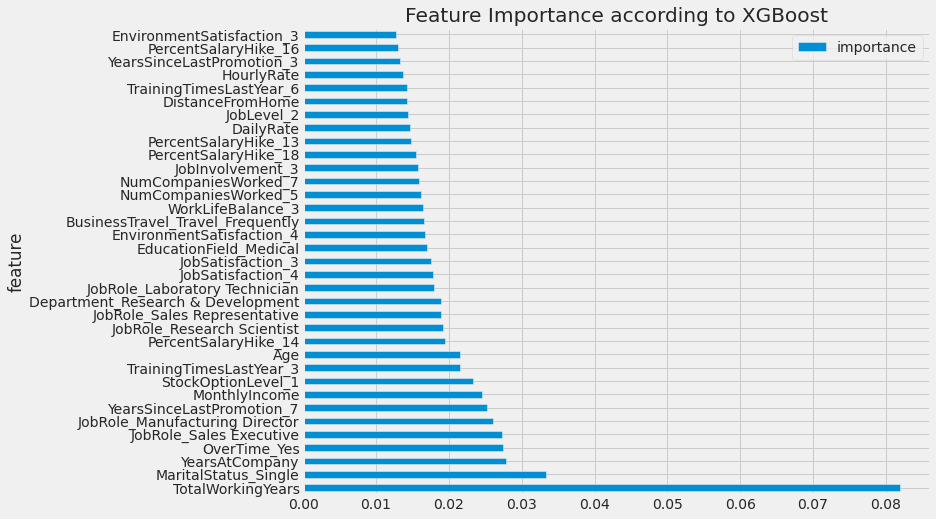

In [170]:
df = feature_imp(X, xgb_clf)[:35]
df.set_index('feature', inplace=True)
df.plot(kind='barh', figsize=(10, 8))
plt.title('Feature Importance according to XGBoost')

 # Artificial Neural Networks (ANNs)

In [171]:
X_train_std = np.array(X_train_std)
X_test_std = np.array(X_test_std)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [172]:
def print_score_ann(label, prediction, train=True):
    if train:
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print("Classification Report:", end='')
        print(f"\tPrecision Score: {precision_score(label, prediction) * 100:.2f}%")
        print(f"\t\t\tRecall Score: {recall_score(label, prediction) * 100:.2f}%")
        print(f"\t\t\tF1 score: {f1_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, prediction)}\n")
        
    elif train==False:
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print("Classification Report:", end='')
        print(f"\tPrecision Score: {precision_score(label, prediction) * 100:.2f}%")
        print(f"\t\t\tRecall Score: {recall_score(label, prediction) * 100:.2f}%")
        print(f"\t\t\tF1 score: {f1_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(label, prediction)}\n")

In [173]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential()

model.add(Dense(X_train.shape[1], activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

r = model.fit(X_train_std, y_train, 
              validation_data=(X_test_std, y_test), 
              epochs=50, 
              class_weight={0:1, 1:2}
             )

Epoch 1/50
33/33 [==============================] - 0s 7ms/step - loss: 0.7280 - accuracy: 0.8163 - val_loss: 0.5367 - val_accuracy: 0.8390
Epoch 2/50
33/33 [==============================] - 0s 4ms/step - loss: 0.6593 - accuracy: 0.8397 - val_loss: 0.4825 - val_accuracy: 0.8390
Epoch 3/50
33/33 [==============================] - 0s 4ms/step - loss: 0.6168 - accuracy: 0.8387 - val_loss: 0.4980 - val_accuracy: 0.8390
Epoch 4/50
33/33 [==============================] - 0s 4ms/step - loss: 0.6118 - accuracy: 0.8397 - val_loss: 0.4486 - val_accuracy: 0.8345
Epoch 5/50
33/33 [==============================] - 0s 4ms/step - loss: 0.5386 - accuracy: 0.8552 - val_loss: 0.4635 - val_accuracy: 0.8231
Epoch 6/50
33/33 [==============================] - 0s 4ms/step - loss: 0.5079 - accuracy: 0.8591 - val_loss: 0.4537 - val_accuracy: 0.8050
Epoch 7/50
33/33 [==============================] - 0s 4ms/step - loss: 0.4394 - accuracy: 0.8824 - val_loss: 0.4523 - val_accuracy: 0.8073
Epoch 8/50
33/33 [==

In [174]:

training_score = model.evaluate(X_train_std, y_train)
testing_score = model.evaluate(X_test_std, y_test)

print(f"TRAINING SCORE: {training_score}")
print(f"TESTING SCORE: {testing_score}")

14/14 [==============================] - 0s 1ms/step - loss: 2.0558 - accuracy: 0.8299
TRAINING SCORE: [0.0007169315358623862, 1.0]
TESTING SCORE: [2.0558371543884277, 0.8299319744110107]


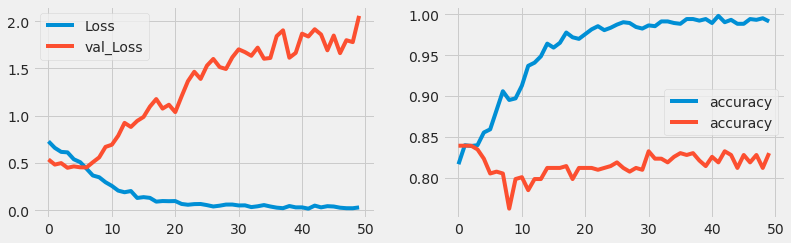

In [175]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='val_Loss')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='accuracy')
plt.legend()

In [176]:

y_train_pred = model.predict(X_train_std)
y_test_pred = model.predict(X_test_std)

print_score_ann(y_train, y_train_pred.round(), train=True)
print_score_ann(y_test, y_test_pred.round(), train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
Classification Report:	Precision Score: 100.00%
			Recall Score: 100.00%
			F1 score: 100.00%
_______________________________________________
Confusion Matrix: 
 [[863   0]
 [  0 166]]

Test Result:
Accuracy Score: 82.99%
_______________________________________________
Classification Report:	Precision Score: 46.15%
			Recall Score: 33.80%
			F1 score: 39.02%
_______________________________________________
Confusion Matrix: 
 [[342  28]
 [ 47  24]]



# Balance the dataset 


In [177]:

X = data.drop('Attrition', axis=1)
y = data.Attrition

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Concatinating X_train and y_train
df = pd.concat([pd.DataFrame(X_train), pd.DataFrame(y_train)], axis=1)
df.head()

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,TotalWorkingYears,YearsAtCompany,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,Education_2,Education_3,Education_4,Education_5,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,EnvironmentSatisfaction_2,EnvironmentSatisfaction_3,EnvironmentSatisfaction_4,Gender_Male,JobInvolvement_2,JobInvolvement_3,JobInvolvement_4,JobLevel_2,JobLevel_3,JobLevel_4,JobLevel_5,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,...,YearsInCurrentRole_12,YearsInCurrentRole_13,YearsInCurrentRole_14,YearsInCurrentRole_15,YearsInCurrentRole_16,YearsInCurrentRole_17,YearsInCurrentRole_18,YearsSinceLastPromotion_1,YearsSinceLastPromotion_2,YearsSinceLastPromotion_3,YearsSinceLastPromotion_4,YearsSinceLastPromotion_5,YearsSinceLastPromotion_6,YearsSinceLastPromotion_7,YearsSinceLastPromotion_8,YearsSinceLastPromotion_9,YearsSinceLastPromotion_10,YearsSinceLastPromotion_11,YearsSinceLastPromotion_12,YearsSinceLastPromotion_13,YearsSinceLastPromotion_14,YearsSinceLastPromotion_15,YearsWithCurrManager_1,YearsWithCurrManager_2,YearsWithCurrManager_3,YearsWithCurrManager_4,YearsWithCurrManager_5,YearsWithCurrManager_6,YearsWithCurrManager_7,YearsWithCurrManager_8,YearsWithCurrManager_9,YearsWithCurrManager_10,YearsWithCurrManager_11,YearsWithCurrManager_12,YearsWithCurrManager_13,YearsWithCurrManager_14,YearsWithCurrManager_15,YearsWithCurrManager_16,YearsWithCurrManager_17,Attrition
714,50,1126,1,66,17399,6615,32,5,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
135,36,216,6,84,4941,2819,7,3,0,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1271,21,337,7,31,2679,4567,1,1,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
477,50,1246,3,99,18200,7999,32,32,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
806,52,994,7,87,10445,15322,18,8,0,1,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [178]:

df.shape

(1029, 136)

In [179]:
from sklearn.utils import resample

minority_class = df[df.Attrition == 1]
majority_class = df[df.Attrition == 0]

majority_downsample = resample(majority_class, replace=False, 
                               n_samples=minority_class.shape[0], 
                               random_state=42)

df_2 = pd.concat([majority_downsample, minority_class])
df_2.Attrition.value_counts()

1    176
0    176
Name: Attrition, dtype: int64

In [180]:
X_train = df_2.drop('Attrition', axis=1)
y_train = df_2.Attrition

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)
X_std = scaler.transform(X)

# **LogisticRegression**

In [181]:
lr_classifier = LogisticRegression(solver='liblinear', penalty='l1')
lr_classifier.fit(X_train_std, y_train)

print_score(lr_classifier, X_train_std, y_train, X_test_std, y_test, train=True)
print_score(lr_classifier, X_train_std, y_train, X_test_std, y_test, train=False)

Train Result:
Accuracy Score: 91.19%
_______________________________________________
Classification Report:	Precision Score: 90.96%
			Recall Score: 91.48%
			F1 score: 91.22%
_______________________________________________
Confusion Matrix: 
 [[160  16]
 [ 15 161]]

Test Result:
Accuracy Score: 68.48%
_______________________________________________
Classification Report:	Precision Score: 26.79%
			Recall Score: 73.77%
			F1 score: 39.30%
_______________________________________________
Confusion Matrix: 
 [[257 123]
 [ 16  45]]



# **RandomForestClassifier**

In [182]:
rand_forest = RandomForestClassifier(n_estimators=1500, 
                                     bootstrap=True, 
                                     oob_score=True
                                    )
rand_forest.fit(X_train, y_train)

print_score(rand_forest, X_train, y_train, X_test, y_test, train=True)
print_score(rand_forest, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
Classification Report:	Precision Score: 100.00%
			Recall Score: 100.00%
			F1 score: 100.00%
_______________________________________________
Confusion Matrix: 
 [[176   0]
 [  0 176]]

Test Result:
Accuracy Score: 74.60%
_______________________________________________
Classification Report:	Precision Score: 29.60%
			Recall Score: 60.66%
			F1 score: 39.78%
_______________________________________________
Confusion Matrix: 
 [[292  88]
 [ 24  37]]



# **SVC**

In [183]:
svc = SVC(kernel='linear')
svc.fit(X_train_std, y_train)

print_score(svc, X_train_std, y_train, X_test_std, y_test, train=True)
print_score(svc, X_train_std, y_train, X_test_std, y_test, train=False)

Train Result:
Accuracy Score: 94.89%
_______________________________________________
Classification Report:	Precision Score: 94.89%
			Recall Score: 94.89%
			F1 score: 94.89%
_______________________________________________
Confusion Matrix: 
 [[167   9]
 [  9 167]]

Test Result:
Accuracy Score: 67.57%
_______________________________________________
Classification Report:	Precision Score: 26.16%
			Recall Score: 73.77%
			F1 score: 38.63%
_______________________________________________
Confusion Matrix: 
 [[253 127]
 [ 16  45]]



# **XGBClassifier**

In [184]:
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)

print_score(xgb_clf, X_train, y_train, X_test, y_test, train=True)
print_score(xgb_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 97.44%
_______________________________________________
Classification Report:	Precision Score: 98.83%
			Recall Score: 96.02%
			F1 score: 97.41%
_______________________________________________
Confusion Matrix: 
 [[174   2]
 [  7 169]]

Test Result:
Accuracy Score: 75.96%
_______________________________________________
Classification Report:	Precision Score: 31.40%
			Recall Score: 62.30%
			F1 score: 41.76%
_______________________________________________
Confusion Matrix: 
 [[297  83]
 [ 23  38]]



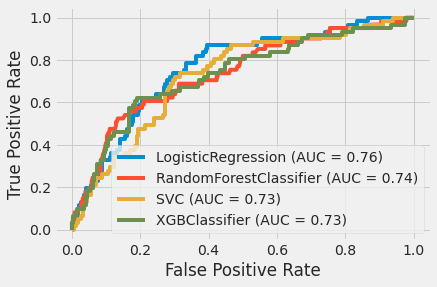

In [185]:
disp = plot_roc_curve(lr_classifier, X_test_std, y_test)
plot_roc_curve(rand_forest, X_test, y_test, ax=disp.ax_)
plot_roc_curve(svc, X_test_std, y_test, ax=disp.ax_)
plot_roc_curve(xgb_clf, X_test, y_test, ax=disp.ax_)